<b>Level-1 Task-1

Task: <b>Top Cuisines
- Determine the top three most common cuisines in the dataset.

- Calculate the percentage ofrestaurants that serve each of the top cuisines.



# Loading dataset:

In [1]:
# Import all necessary libraies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as ans

In [8]:
# Load the dataset:

df = pd.read_csv('data.csv')


In [9]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [10]:
# Number of rows and columns:

df.shape

(9551, 21)

# Determine the top three most common cuisines.

In [14]:
# Extract cuisines and their count occurences:

cuisines_counts = df['Cuisines'].str.split(',').explode().value_counts()

top_three_cuisines = cuisines_counts.head(3)
print('Top three most common cuisines')
top_three_cuisines

Top three most common cuisines


North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: Cuisines, dtype: int64

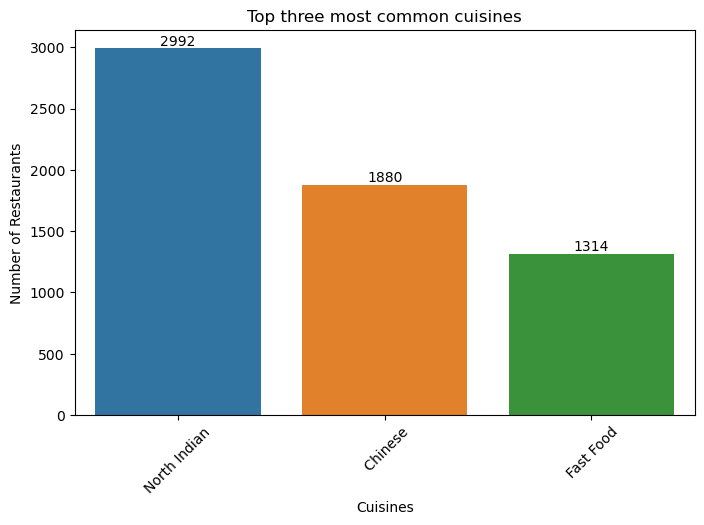

In [17]:
top_three_cuisines = top_three_cuisines.sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(8,5))
ax = ans.barplot(x=top_three_cuisines.index, y=top_three_cuisines.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top three most common cuisines')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisines')
plt.show()


# Calculate the percentage of restaurants that serve each of the top cuisines.

In [18]:
total_restaurants = len(df)
percentage_per_cuisines = (top_three_cuisines / total_restaurants) * 100

print('percentage of restaurants for top three cuisines')
percentage_per_cuisines

percentage of restaurants for top three cuisines


North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: Cuisines, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_10876\1054006147.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])


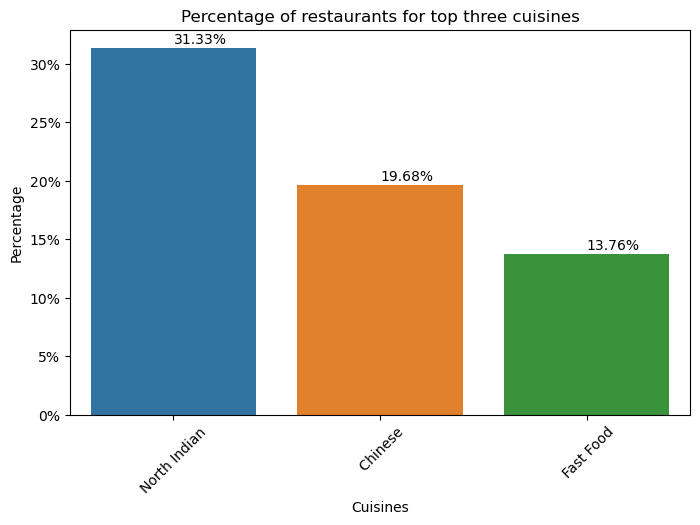

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
ax= ans.barplot(x=percentage_per_cuisines.index, y=percentage_per_cuisines.values)
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3),
               textcoords= "offset points",)
plt.title('Percentage of restaurants for top three cuisines')
plt.xticks(rotation=45)
ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])
plt.ylabel('Percentage')
plt.xlabel('Cuisines')
plt.show()

<b>Level-1 Task-2

Task: <b>City Analysis
    
- Identify the city with the highest number of restaurants in the dataset.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.

# Loading dataset:

In [9]:
# Import all necessary libraies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as ans

In [3]:
# Load the dataset:

df = pd.read_csv('data.csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
# Number of rows and columns:

df.shape

(9551, 21)

In [5]:
# Check the columns name and its datatypes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Identify the city with the highest number of restaurants in the dataset.

In [7]:
print(df['City'].value_counts()[[0]].index[0])

New Delhi


# Calculate the average rating for restaurants in each city.


In [8]:
average_rating = df.groupby('City')['Aggregate rating'].mean()
print(average_rating)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


# Determine the city with the highest average rating.


In [11]:
highest_rated_city = average_rating.idxmax()
value = average_rating.max()
print("The city with the highest average rating is:", highest_rated_city,",","Rating -",value)

The city with the highest average rating is: Inner City , Rating - 4.9


<b>Level-1 Task-3

Task: <b>Price Range Distribution

- Create a histogram or bar chart to visualize the distribution of price range among the restaurants.
- Calculate the percentage of restaurants in each price range category.


# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

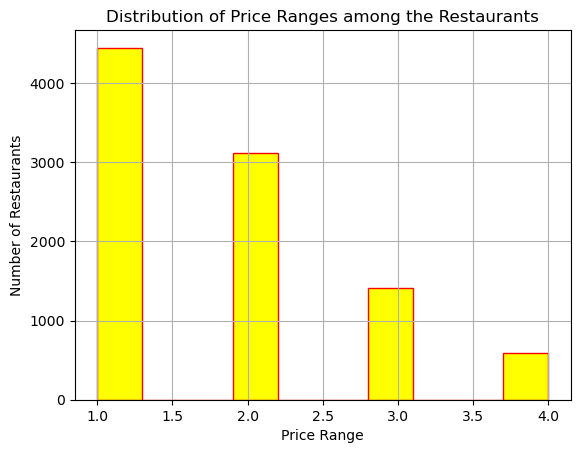

In [16]:
df.hist(column='Price range', color='yellow', edgecolor='red')
plt.title('Distribution of Price Ranges among the Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

# Calculate the percentage of restaurants in each price range category.

In [20]:
price_range_counts = df['Price range'].value_counts()
price_range_percentage = price_range_counts / len(df)*100,
print(price_range_percentage)

(1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64,)


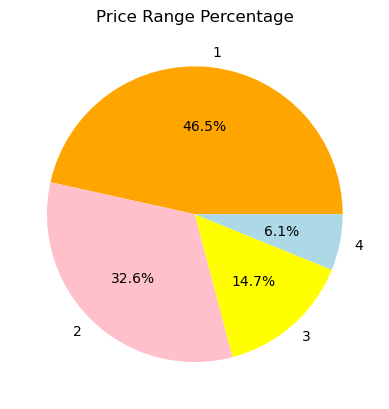

In [29]:
plt.pie(percentage, labels = percentage.index, autopct = '%1.1f%%', colors= ('orange','pink','yellow','lightblue'))
plt.title('Price Range Percentage')
plt.show()

<b>Level-1 Task-4

Task: <b>Online Delivery

- Determine the percentage of restaurants that offer online delivery.
- Compare the average ratings of restaurants with and without online delivery.

# Loading dataset:

In [5]:
# Import all necessary libraies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as ans

In [6]:
# Load the dataset:

df = pd.read_csv('data.csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [7]:
# Number of rows and columns:

df.shape

(9551, 21)

In [12]:
# Check the columns name and its datatype:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


# Determine the percentage of restaurants that offer online delivery.

In [17]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes', 0)
print("Total Restaurent with Online Delivery : ",online_delivery)

Total Restaurent with Online Delivery :  2451


In [18]:
no = df['Has Online delivery'].value_counts().get('No', 0)
print("Restaurent with No Online Delivery : ",no)

Restaurent with No Online Delivery :  7100


In [19]:
Row_count = len(df)
percentage_of_online_delivery = round((online_delivery/Row_count)*100,2)
print("Total % of Online Delivery :",percentage_of_online_delivery)

Total % of Online Delivery : 25.66


In [20]:
percentage_of_No_online_delivery = round((no/Row_count)*100,2)
print("Total % where Online Delivery is not present : ", percentage_of_No_online_delivery)

Total % where Online Delivery is not present :  74.34


# Compare the average ratings of restaurants with and without online delivery.

In [21]:
Avg_rating_yes = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
print("Average Rating with Online Delivery :",Avg_rating_yes)

Average Rating with Online Delivery : 3.25


In [23]:
Avg_rating_No = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print("Average Rating without Online Delivery :",Avg_rating_No)

Average Rating without Online Delivery : 2.47


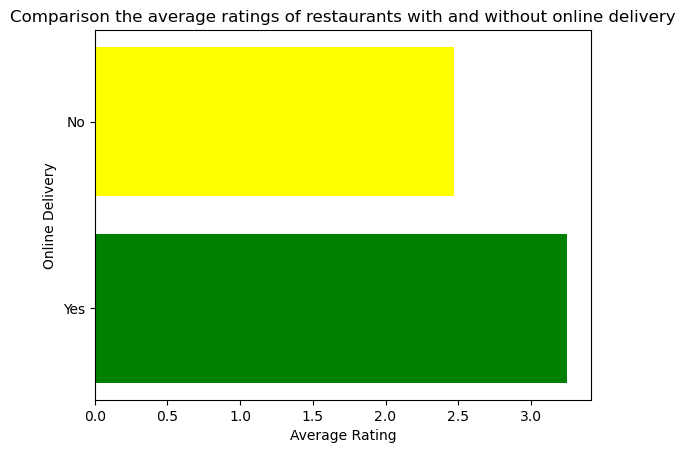

In [24]:
labels = ['Yes','No']
average_rating = [Avg_rating_yes, Avg_rating_No]
colors = 'green','yellow'
plt.barh(labels, average_rating, color=colors)
plt.ylabel('Online Delivery')
plt.xlabel('Average Rating')
plt.title('Comparison the average ratings of restaurants with and without online delivery')
plt.show()